Dataset complete info: https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [57]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [58]:
import pandas as pd
pd.read_csv(car_data, header=None)
columns =["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class_value"]
df = pd.read_csv(car_data, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,Class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [60]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class_value, Length: 1728, dtype: object

In [61]:
df["Class_value"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [64]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

## Decision Tree

In [65]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(3025.027173913043, 2627.4, 'persons <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = doors'),
 Text(2944.157608695652, 2446.2, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = doors'),
 Text(3105.8967391304345, 2446.2, 'safety <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = doors'),
 Text(1667.9347826086955, 2265.0, 'maint <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = buying'),
 Text(909.7826086956521, 2083.8, 'buying <= 0.5\ngini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = buying'),
 Text(242.60869565217388, 1902.6, 'doors <= 0.5\ngini = 0.103\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = buying'),
 Text(161.7391304347826, 1721.4, 'lug_boot <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]\nclass = buying'),
 Text(80.8695652173913, 1540.2, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]\nclass = buying'),
 Text(242.60869565217388, 1540.2, 'persons <= 1.5\ngini = 0.48\nsam

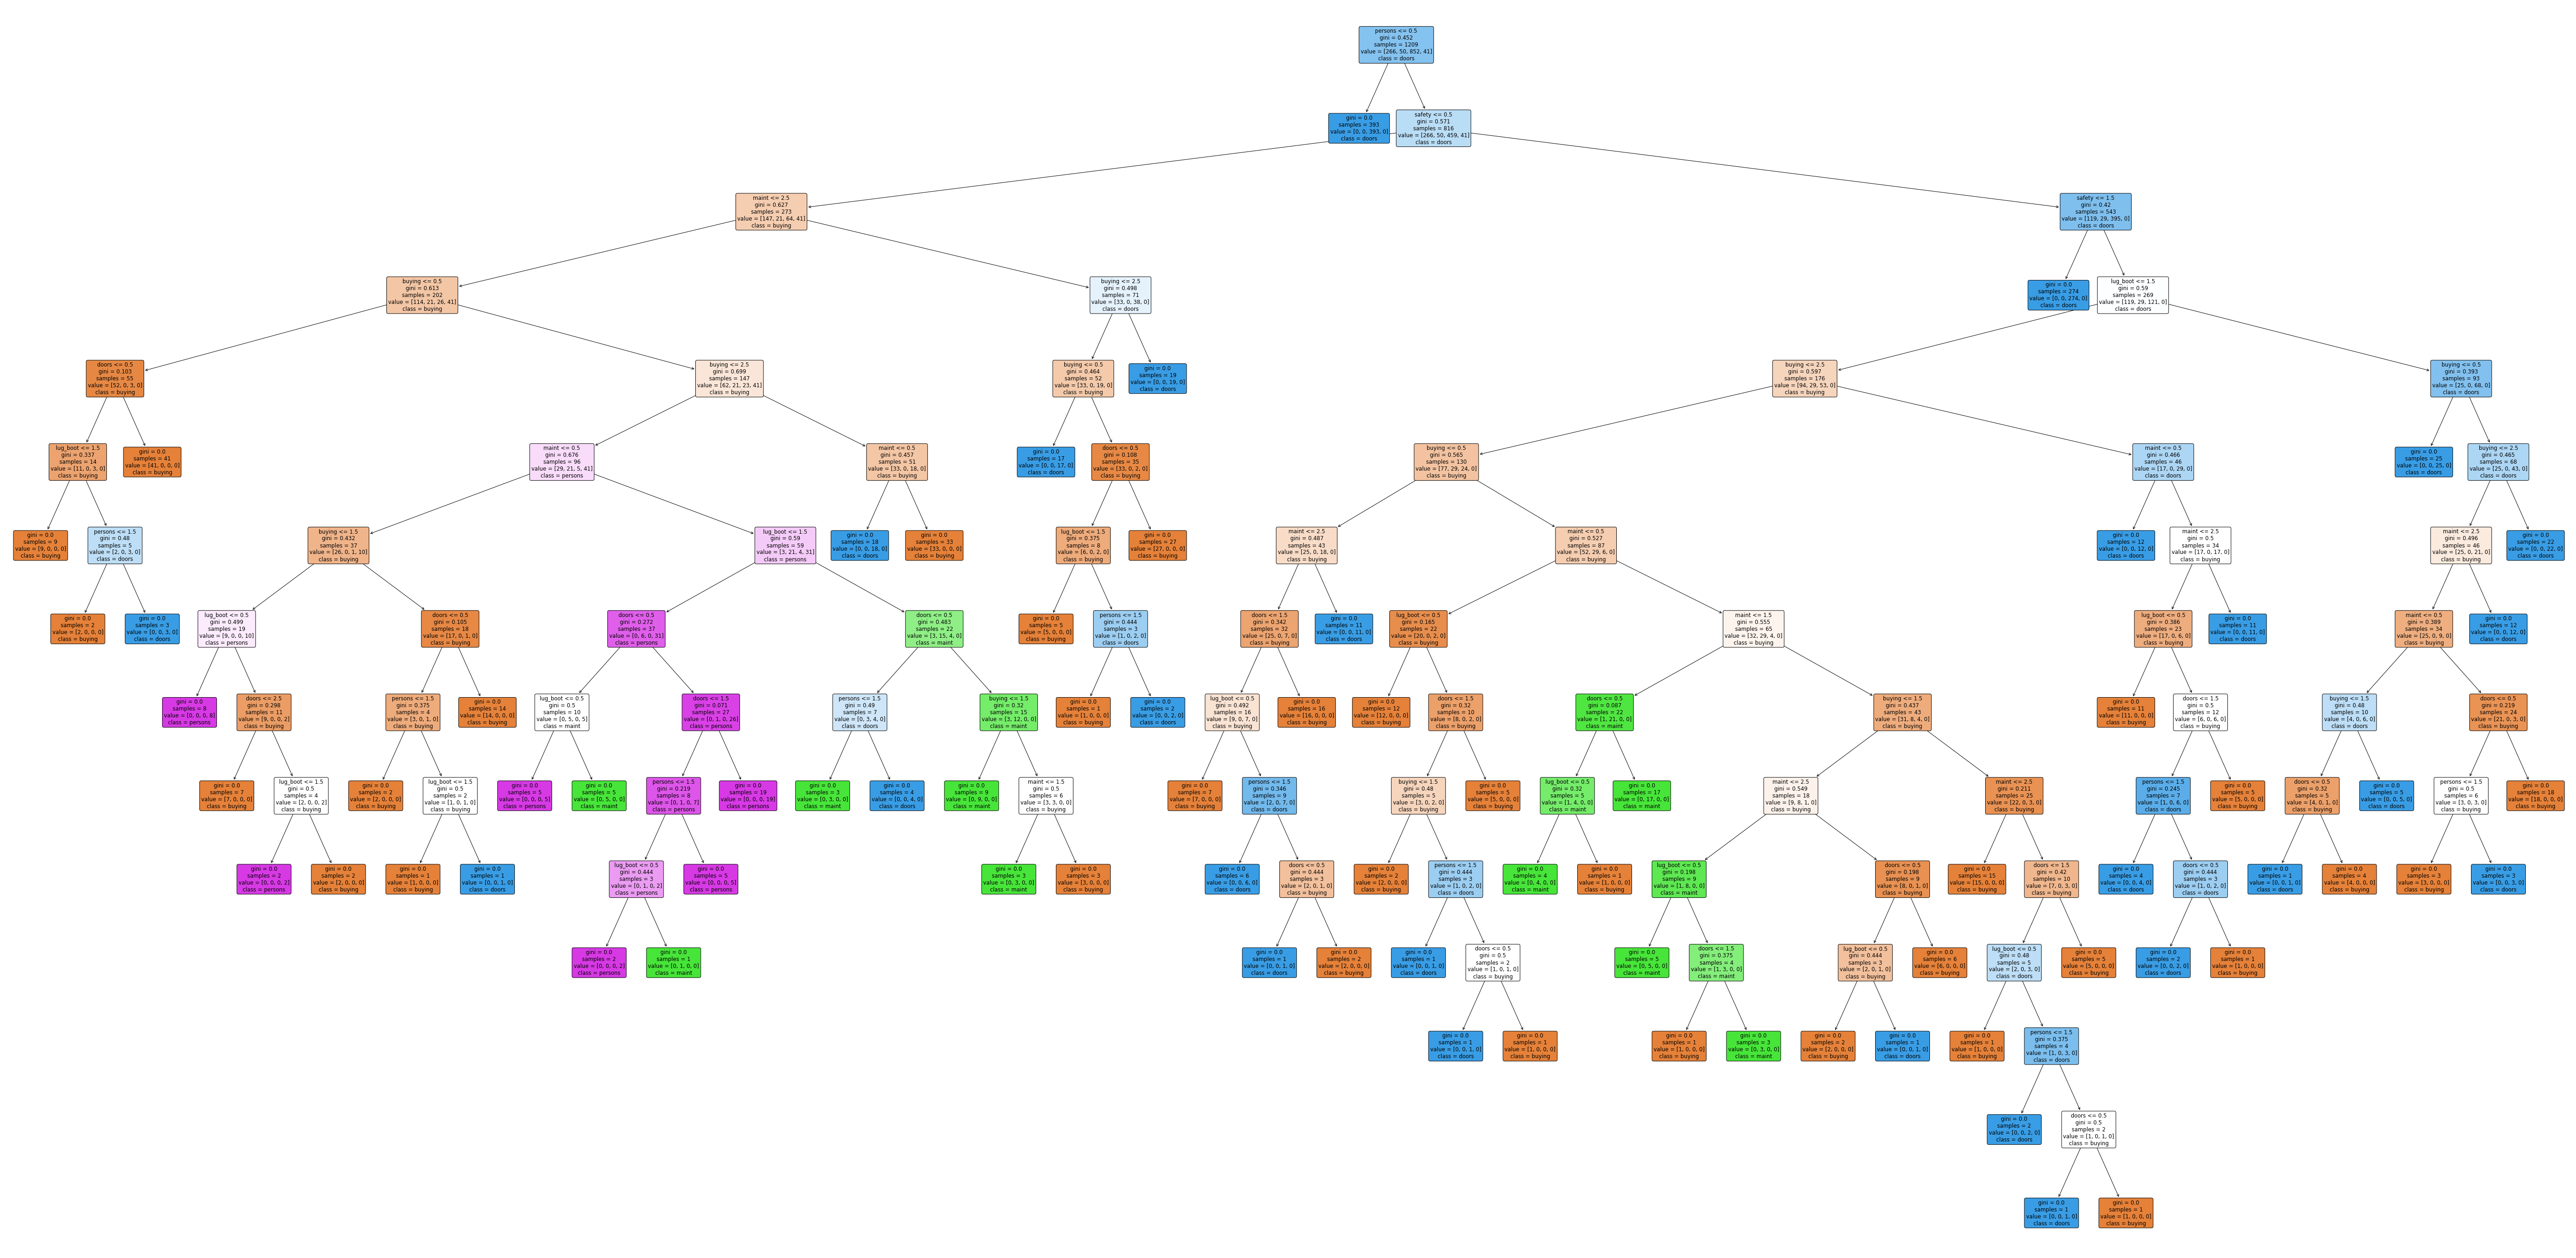

In [66]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 50))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=["buying", "maint", "doors", "persons", "lug_boot", "safety"],
         feature_names=X.columns)

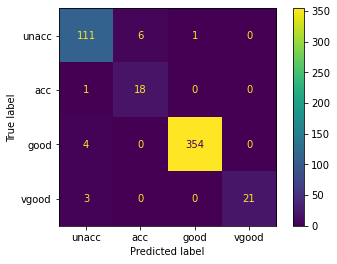

In [67]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [68]:

predictions = dt_clf.predict(X_test)

In [69]:
accuracy = (predictions==y_test).sum()/(len(y_test))
accuracy

0.9710982658959537

In [70]:
print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Test set score: 0.9711


In [49]:
from sklearn.metrics import accuracy_score

print('Accuracy score with criterion gini index: {0:0.4f}%'. format(accuracy_score(y_test,predictions)*100))

Accuracy score with criterion gini index: 97.1098%


In [71]:
from sklearn.model_selection import GridSearchCV
#Hyper parameter selection
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
             }
# Applying Gridsearch for hyper parameter selection
dt_optimized = GridSearchCV(dt_clf, param_grid, scoring='accuracy', cv=10, verbose=1)
dt_optimized.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=1)

In [73]:
dt_pred = dt_optimized.predict(X_test)

In [74]:
dt_optimized.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [77]:
print('CV Accuracy: %0.3f' % dt_optimized.best_score_)

CV Accuracy: 0.983


## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)

predictions = rf_clf.predict(X_test)
print("Accuracy:", (predictions == y_test).mean())
param_grid = {'criterion':['gini', 'entropy'],
              'n_estimators':[x for x in range(1,110,10)]
             }
rf_optimized = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=10, verbose=1)
rf_optimized.fit(X_train, y_train)
rf_pred = rf_optimized.predict(X_test)
rf_optimized.best_params_

Accuracy: 0.976878612716763
Fitting 10 folds for each of 22 candidates, totalling 220 fits


{'criterion': 'entropy', 'n_estimators': 71}

## PCA & LDA

In [80]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = PCA(5)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
pca_transform_X = pca.transform(X_train)
pca_transform_X_test = pca.transform(X_test)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(pca_transform_X, y_train)
y_pred = decision_tree.predict(pca_transform_X_test)
print("Accuracy with PCA: ",(y_pred == y_test).mean())

#LDA
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train, y_train)
print(lda.explained_variance_ratio_)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
dt_lda = DecisionTreeClassifier()
dt_lda.fit(X_train_lda, y_train)
lda_pred = dt_lda.predict(X_test_lda)
print("Accuracy with LDA: ", (lda_pred == y_test).mean())


[0.22563367 0.21738459 0.21188922 0.1174115  0.11647761]
Accuracy with PCA:  0.8689788053949904
[0.84628566 0.14464443 0.00906991]
Accuracy with LDA:  0.7572254335260116
